## Importing Required Libraries

In [305]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Read DataFrame

In [153]:
df=pd.read_csv(r"C:\#Users\Irfan\Downloads\scores_data.zip")
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


## Basic Exploration

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


## Cleaning and Type casting

In [155]:
## clean the columns
df.columns=df.columns.str.replace(' ','')

In [156]:
#data cleaning
df['Score']=df['Score'].apply(lambda x:str(x).split()[0][0])

In [157]:
df['Score'].value_counts()

4    40
5    32
3    24
7    18
6    18
2    12
1     3
0     2
Name: Score, dtype: int64

In [158]:
#Type conversion
df['Score']=df['Score'].astype('int')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 3.0+ KB


In [314]:
## cheacking Null values
df.isnull().sum()

Batch          0
User_ID        0
Score          0
Performance    0
dtype: int64

In [345]:
df.duplicated().sum()

0

## Statistical Analysis

In [160]:
df['Score'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Score,149.0,4.38255,1.592199,0.0,3.0,4.0,5.0,7.0


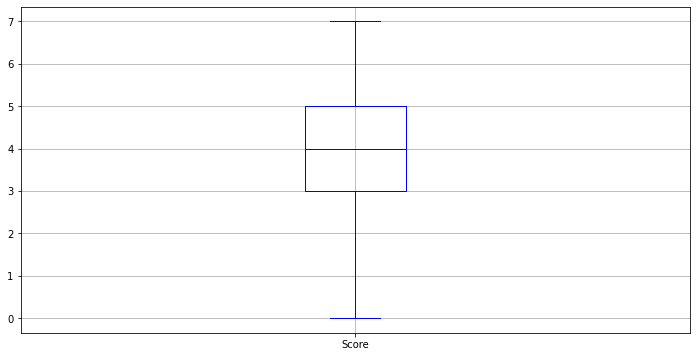

In [329]:
# checking Outliers
df['Score'].plot(kind='box',figsize=(12,6),grid=True,color='blue');

## Observation: 
- Here The maximum density of AI_ELITE-7 is at 4.

##  Finding The Best Performing Batch

In [293]:
table = pd.pivot_table(df, values=['Score'], columns=['Batch'],aggfunc={'Score': np.mean})
table

Batch,AI_ELITE_4,AI_ELITE_6,AI_ELITE_7
Score,3.791667,4.229167,5.056604


In [294]:
table1 = pd.pivot_table(df, values=['Score'], columns=['Batch'],aggfunc={'Score': np.std})
table1

Batch,AI_ELITE_4,AI_ELITE_6,AI_ELITE_7
Score,1.443376,1.640441,1.446682


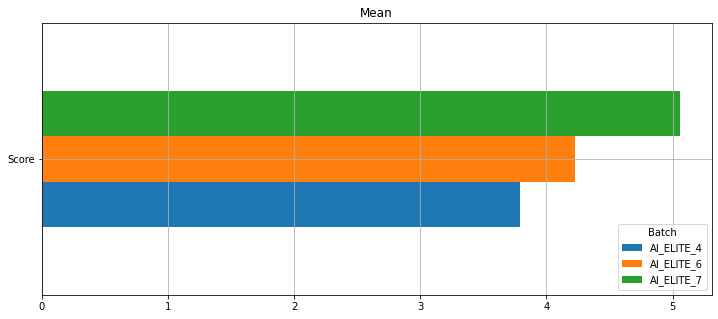

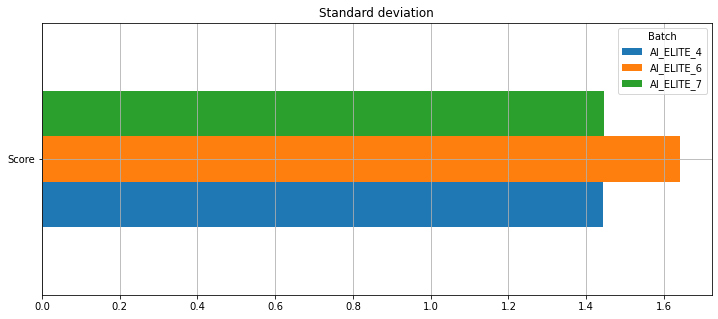

In [340]:
table.plot(kind='barh',figsize=(12,5),title='Mean',grid=True)
table1.plot(kind='barh',figsize=(12,5),title='Standard deviation',grid=True);

### Observation: 
- Here we observe that AI_ELITE_7 is best performance becuase the Average is maximum and Standard Deviation is low .

## Here we add a Performance column based on score

In [176]:
df["Performance"] = (df['Score']).apply(lambda n: "Excellent" if n > 5 else ("Average" if 3<=n<=5 else ("poor")))

In [181]:
df.head()

,Batch,User_ID,Score,Performance
0,AI_ELITE_7,uid_149,6,Excellent
1,AI_ELITE_7,uid_148,6,Excellent
2,AI_ELITE_7,uid_147,7,Excellent
3,AI_ELITE_7,uid_146,7,Excellent
4,AI_ELITE_7,uid_145,4,Average


In [377]:
df1=pd.crosstab(df['Performance'],df['Batch'])
df1

Batch,AI_ELITE_4,AI_ELITE_6,AI_ELITE_7
Performance,,,
Average,35,33,28
Excellent,4,9,23
poor,9,6,2


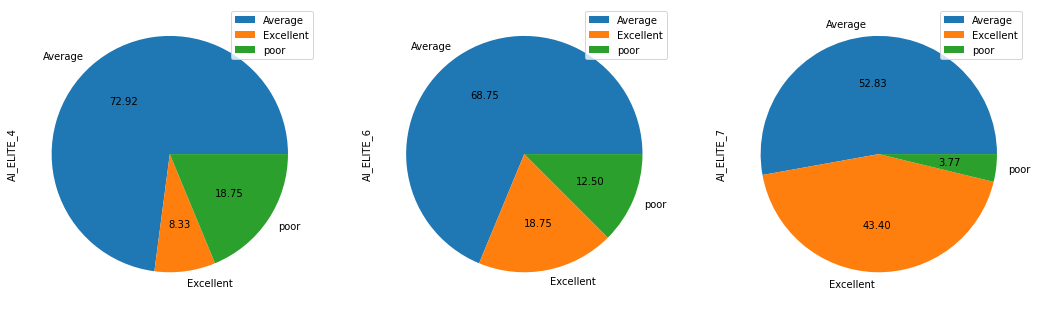

In [368]:
df1.plot(kind='pie',figsize=(18,10),subplots=True,autopct="%.2f");

## Observation:
- Here we observe that the three batches are having more Average percentage.

In [366]:
df2=pd.crosstab(df['Performance'],df['Batch'],margins=True)
df2

Batch,AI_ELITE_4,AI_ELITE_6,AI_ELITE_7,All
Performance,,,,
Average,35,33,28,96
Excellent,4,9,23,36
poor,9,6,2,17
All,48,48,53,149


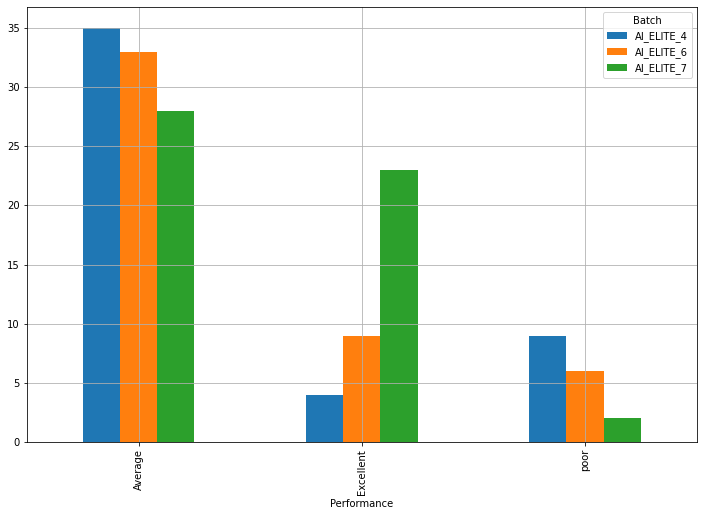

In [343]:
df1.plot(kind='bar',figsize=(12,8),grid=True);

## Observation:
- By observing the above graph we can say that performance of AI_ELITE_4, AI_ELITE_6, AI_ELITE_7 batches Excellent performance increasing and poor performance decreasing respectively.  